In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
plt.xkcd()

# Data prep code to create `doctor.csv`

This code requires raw data from [the HSC 2008 Health Tracking Physician Survey, available from ICPSR](https://www.icpsr.umich.edu/icpsrweb/HMCA/studies/27202).

In [2]:
dname = '/home/j/DATA/USA/HEALTH_TRACKING_PHYSICIAN_SURVEY/2008/'

Here is what a bit of the raw data looks like:

In [3]:
!head $dname/USA_HEALTH_TRACKING_PHYSICIAN_SURVEY_2008_RECORD_LAYOUT_Y2016M10D17.TXT

                       Record Layout for ICPSR 27202

          Health Tracking Physician Survey, 2008: [United States]

                       Dataset 0001: Public-Use Data
 

VARNAME    VARTYPE ASCIIFMT START END   LABEL
PHYSIDX    NUM     6.0      1     6     PH5:Physician id number, masked
BIRTHX     NUM     2.0      7     8     AMA:Birth year


In [4]:
!head -1 $dname/USA_HEALTH_TRACKING_PHYSICIAN_SURVEY_2008_Y2016M10D17.TXT

500001 4 1 2 2 0 4 1 6 3 0 0 1 20 3 14541 60 0 0 0 0 2 1 3 3 2 2 0-1 551 5 40 2 1 4 1 1 1 3 0-1 1 0-1 1 0-1 1 1 3 2 0-1 1 1 1 3 1 1 3 1 1 3 1 1 3 0-1 1 0-1 1 1 1 3 1 1 3 1 1 3 1 2 3 2-8 2 -1 1 0 2 6 4 4 0-9 0-9 0-9 0-9 0-9 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0-1-1 2-1-1-1 2 1 4 0 2 1 1 90 5 4 2 3 3 2 2 1 3 3 1 4-1-1-1-1-1 4-1-1-1-1-1 4 10100  0 0 3 3 2 2 2 1 1 0 0 0 0 1 0 0-1 0-1 0-1 0-1 0-1 0 1 0 0 0 0 0 0 0 3 0 2 1 82.630155


First load the record layout data:

In [5]:
colspecs = [[0,10], [11,18], [19,27], [28, 33], [34, 39], [40,1000]]
layout_df = pd.read_fwf(dname+'USA_HEALTH_TRACKING_PHYSICIAN_SURVEY_2008_RECORD_LAYOUT_Y2016M10D17.TXT',
                        header=7, colspecs=colspecs)
layout_df.head()

,VARNAME,VARTYPE,ASCIIFMT,START,END,LABEL
0,PHYSIDX,NUM,6.0,1,6,"PH5:Physician id number, masked"
1,BIRTHX,NUM,2.0,7,8,AMA:Birth year
2,GENDER,NUM,2.0,9,10,"PH5:AMA:Sex,1-Male,2-Female"
3,RCARSAT,NUM,2.0,11,12,PH5:1.Overall Career satisfaction
4,YRBGNX,NUM,2.0,13,14,PH5:2.Year began practicing medicine


Then use that to load the raw data:

In [6]:
colspecs = [list(x) for x in zip(layout_df.START-1, layout_df.END)]
df = pd.read_fwf(dname+'USA_HEALTH_TRACKING_PHYSICIAN_SURVEY_2008_Y2016M10D17.TXT',
                 colspecs=colspecs, header=None, names=layout_df.VARNAME)
df.head()

,PHYSIDX,BIRTHX,GENDER,RCARSAT,YRBGNX,PCP,SPEC,BDCTPSP,PRCTYPE,OWNPR,...,PYCNSLT,CSTTRVL,CMECRDT,GFTOTHX,MRELCMPX,INCCAT,INCPROD,RACETHX,ADM_PAT,WEIGHT
0,500001,4,1,2,2,0,4,1,6,3,...,0,0,0,0,0,3,0,2,1,82.630155
1,500002,2,1,5,1,0,5,1,1,1,...,0,0,0,0,2,6,5,2,0,74.170794
2,500003,3,1,2,2,0,4,1,2,2,...,0,0,0,0,0,3,5,2,1,88.704486
3,500004,7,2,4,6,1,1,1,3,3,...,0,-9,0,0,0,2,5,3,0,103.870154
4,500005,8,1,4,7,1,2,1,6,3,...,1,1,1,0,3,3,0,2,0,78.126163


Transform some interesting columns from the raw data for use in visualization exercises:

In [7]:
df['id'] = df.PHYSIDX

In [8]:
yob_map = {1:1938, 2:1943, 3:1948, 4:1953, 5:1958, 6:1963, 7:1968, 8:1973}

df['age'] = 2008 - df.BIRTHX.map(yob_map)
df.age.value_counts().sort_index()

35    484
40    693
45    735
50    815
55    795
60    571
65    335
70    292
Name: age, dtype: int64

In [9]:
df['sex'] = df.GENDER.map({1:'M', 2:'F'})
df.sex.value_counts()

M    3470
F    1250
Name: sex, dtype: int64

In [10]:
df['race'] = df.RACETHX.map({1:'Hispanic', 2:'White', 3:'Black', 4:'Asian', 5:'Other'})
df.race.value_counts()

White       3452
Asian        685
Hispanic     244
Black        167
Other         60
Name: race, dtype: int64

In [11]:
df['specialty'] = df.SPEC.map({1:'Internal Medicine', 2:'Family/GP', 3:'Pediatrics',
                               4:'Medical Specialties', 5:'Surgical Specialties',
                              6:'Psychiatry', 7:'Ob/Gyn'})
df.specialty.value_counts()

Medical Specialties     1301
Surgical Specialties     902
Family/GP                829
Internal Medicine        634
Pediatrics               427
Psychiatry               314
Ob/Gyn                   313
Name: specialty, dtype: int64

In [12]:
df['weeks_per_year'] = df.WKSWRKX.astype(int)
pd.cut(df.weeks_per_year, bins=[39, 40, 52]).value_counts()

(40, 52]    4380
(39, 40]     340
Name: weeks_per_year, dtype: int64

In [13]:
df['hours_per_week'] = df.HRSMEDX.astype(int)
pd.cut(df.hours_per_week, bins=[0,40,50,60,80,81], right=False).value_counts()

[40, 50)    1218
[50, 60)    1205
[60, 80)    1137
[0, 40)      859
[80, 81)     301
Name: hours_per_week, dtype: int64

(40, 100.0, 0.0, 0.059999999999999998)

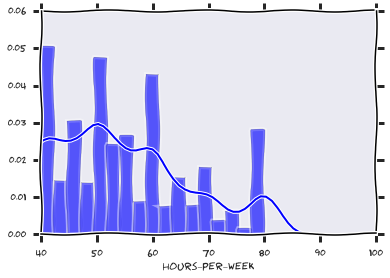

In [14]:
sns.distplot(df.hours_per_week)
plt.axis(xmin=40)

In [15]:
df['it_use'] = df.IT_TRTU.map({1:'Not available', 2:'Avaliable, not used', 3:'Available and used'})
df.it_use.value_counts()

Available and used     3766
Not available           766
Avaliable, not used     118
Name: it_use, dtype: int64

In [16]:
df['minority_health_cme'] = df.EDUMNPT
df.minority_health_cme.value_counts()

 0    2814
 1    1861
-9      45
Name: minority_health_cme, dtype: int64

In [17]:
df['survey_weight'] = df.WEIGHT
df.survey_weight.describe()

count    4720.000000
mean       87.242442
std        14.181912
min        45.352468
25%        76.981041
50%        87.096975
75%        96.734327
max       148.421928
Name: survey_weight, dtype: float64

Save transformed data for use in lesson:

In [18]:
df.columns[-10:]

Index(['id', 'age', 'sex', 'race', 'specialty', 'weeks_per_year',
       'hours_per_week', 'it_use', 'minority_health_cme', 'survey_weight'],
      dtype='object')

In [19]:
df = df.filter(list(df.columns[-10:]))
df.to_csv('doctors.csv', index=False)